In [ ]:
#importing pyspark and reading csv file
import pandas as pd
import numpy as np
!pip install pyspark
import pyspark
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
spark=SparkSession \
      .builder \
      .getOrCreate()
spark.version
path=['C:/Users/chsin/Downloads/fold/202004-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202005-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202006-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202007-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202008-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202009-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202010-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202011-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202012-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202101-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202102-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202103-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202104-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202105-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202106-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202107-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202108-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202109-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202110-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202111-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202112-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202201-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202202-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202203-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202204-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202205-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202206-divvy-tripdata.csv',
     'C:/Users/chsin/Downloads/fold/202207-divvy-tripdata.csv']
df=spark.read.option('delimiter',',').csv(path,sep=',',inferSchema=True,header=True)
type(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=e806bb6c044efd0c59d62c85d7555a6fab628b81b1a46122e9f2d2517d45d46d
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


Py4JJavaError: ignored

# New Section

In [ ]:
#printing dataframe
df.show(5)

+----------------+-------------+-------------------+-------------------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|         ride_id|rideable_type|         started_at|           ended_at|start_station_name|start_station_id|end_station_name|end_station_id|start_lat|start_lng|end_lat|end_lng|member_casual|
+----------------+-------------+-------------------+-------------------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|99FEC93BA843FB20|electric_bike|2021-06-13 14:31:28|2021-06-13 14:34:11|              null|            null|            null|          null|     41.8|   -87.59|   41.8|  -87.6|       member|
|06048DCFC8520CAF|electric_bike|2021-06-04 11:18:02|2021-06-04 11:24:19|              null|            null|            null|          null|    41.79|   -87.59|   41.8|  -87.6|       member|
|9598066F68045DF2|electric_bike|2021-06-04 09

In [ ]:
#analysing if we hane any null values for all columns

from pyspark.sql import functions as F
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) \
           for c in df.columns]).show()

+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|ride_id|rideable_type|started_at|ended_at|start_station_name|start_station_id|end_station_name|end_station_id|start_lat|start_lng|end_lat|end_lng|member_casual|
+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|      0|            0|         0|       0|           1230117|         1230740|         1329051|       1329512|        0|        0|  12495|  12495|            0|
+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+



In [ ]:
#removing null values
df=df.na.drop(subset=df.columns)
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) \
           for c in df.columns]).show()
    

+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|ride_id|rideable_type|started_at|ended_at|start_station_name|start_station_id|end_station_name|end_station_id|start_lat|start_lng|end_lat|end_lng|member_casual|
+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+
|      0|            0|         0|       0|                 0|               0|               0|             0|        0|        0|      0|      0|            0|
+-------+-------------+----------+--------+------------------+----------------+----------------+--------------+---------+---------+-------+-------+-------------+



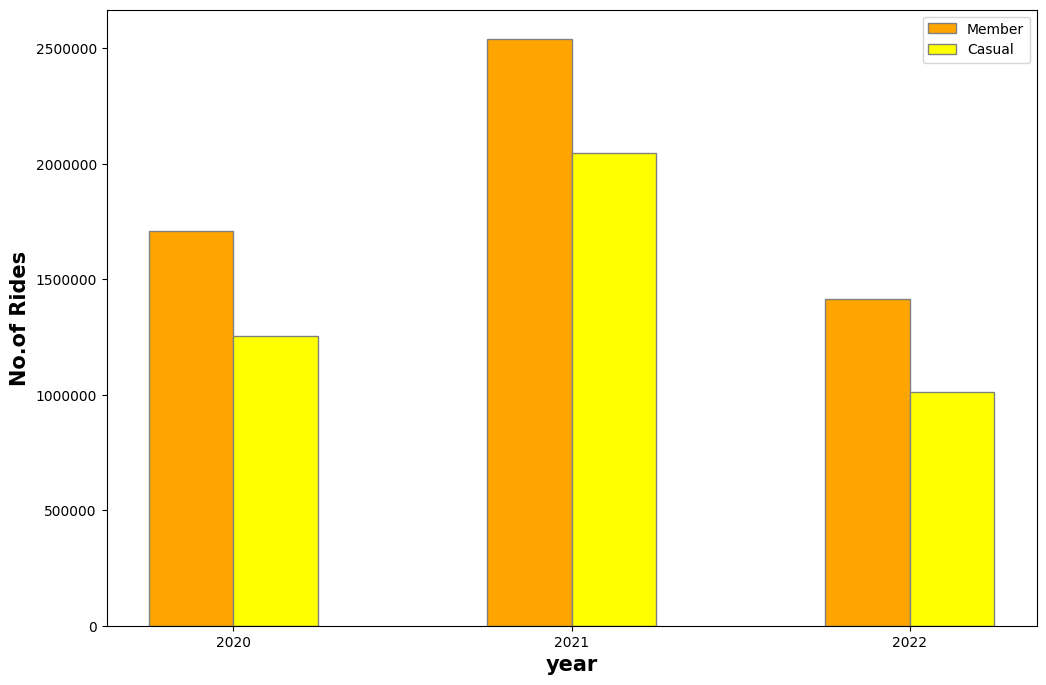

In [ ]:
# (i)no.of rides vs year
from pyspark.sql.functions import *
import numpy as np
import matplotlib.pyplot as plt
lis=df.withColumn("started_at",to_timestamp(col("started_at"))).withColumn("year",year(col("started_at")))
member=lis.filter("member_casual=='member'")
casual=lis.filter("member_casual=='casual'")
lis=lis.groupBy('year').agg(count("*"))
lis=lis.orderBy(lis.year.asc())
a=np.array(lis.select("year").collect())
m=[]
c=[]
li=[]
for i in a:
    li.append(i[0])
for i in li:
    u=member.filter(member.year == str(i))
    v=casual.filter(casual.year ==str(i))
    u=u.agg(count("*"))
    v=v.agg(count("*"))
    var=np.array(u.collect())
    m.append(var[0][0])
    var=np.array(v.collect())
    c.append(var[0][0])
barWidth=0.25
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(m))
br2=[x+barWidth for x in br1]
plt.ticklabel_format(style='plain')
plt.bar(br1,m,color='orange',width=barWidth,edgecolor='grey',label='Member')
plt.bar(br2,c,color='yellow',width=barWidth,edgecolor='grey',label='Casual')
plt.ylabel('No.of Rides',fontweight='bold',fontsize=15)
plt.xlabel('year',fontweight='bold',fontsize=15)
plt.xticks([0.125+r for r in range(len(m))],li)
plt.legend()
plt.show()

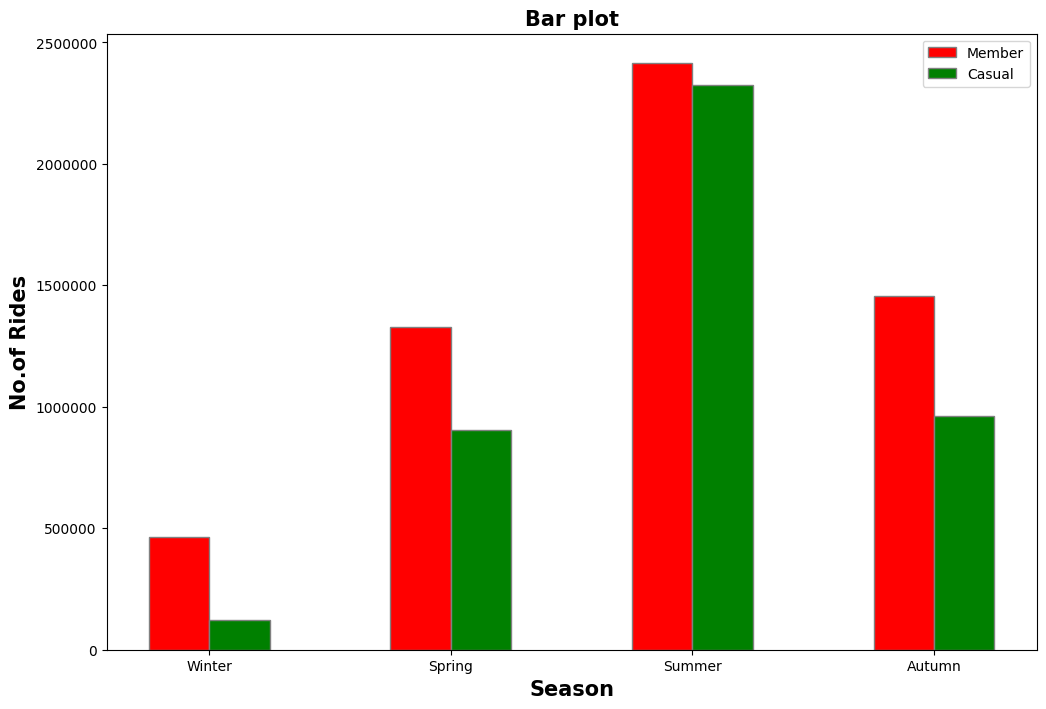

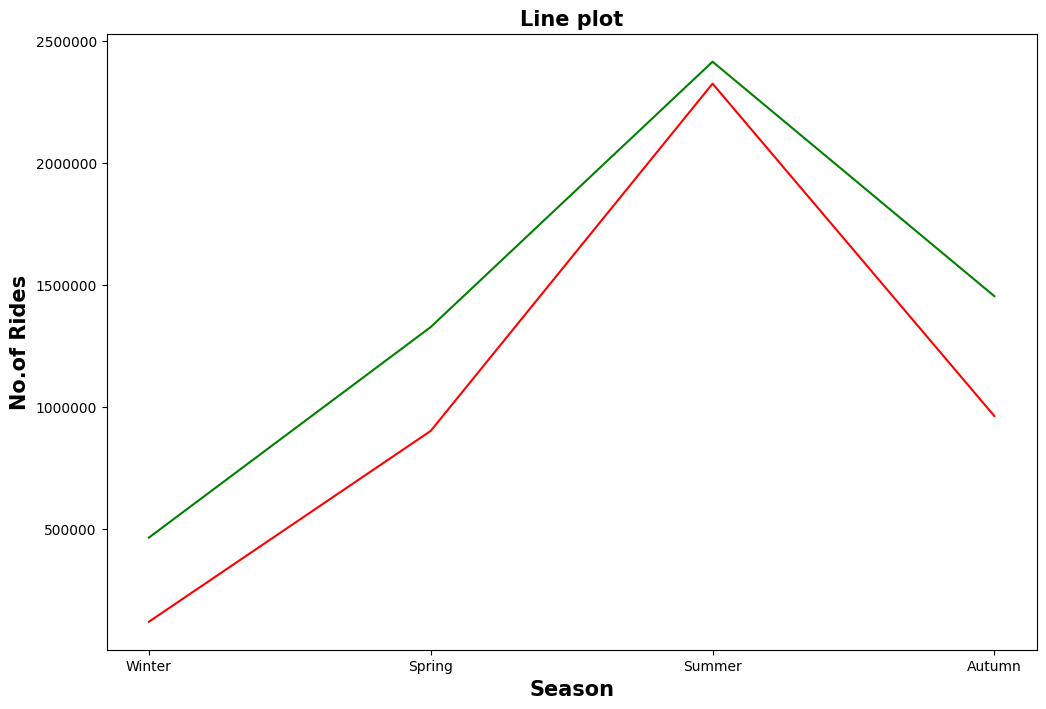

In [ ]:
#(ii)no.of rides over month
lis=df.withColumn("started_at",to_timestamp(col("started_at"))).withColumn("month",month(col("started_at")))
member=lis.filter("member_casual=='member'")
casual=lis.filter("member_casual=='casual'")
lis=lis.groupBy('month').agg(count("*"))
lis=lis.orderBy(lis.month.asc())
a=np.array(lis.select("month").collect())
m=[0]*4
c=[0]*4
li=[]
for i in a:
    li.append(i[0])
li=[[12,1,2],[3,4,5],[6,7,8],[9,10,11]]
z=1
for i in li:
    u=member.filter(member.month == str(i[0]))
    v=casual.filter(casual.month ==str(i[0]))
    u=u.agg(count("*"))
    v=v.agg(count("*"))
    var1=np.array(u.collect())
    var2=np.array(v.collect())
    u=member.filter(member.month == str(i[1]))
    v=casual.filter(casual.month ==str(i[1]))
    u=u.agg(count("*"))
    v=v.agg(count("*"))
    var1=np.append(var1,np.array(u.collect()))
    var2=np.append(var2,np.array(v.collect()))
    u=member.filter(member.month == str(i[2]))
    v=casual.filter(casual.month ==str(i[2]))
    u=u.agg(count("*"))
    v=v.agg(count("*"))
    var1=np.append(var1,np.array(u.collect()))
    var2=np.append(var2,np.array(v.collect()))
    m[z-1]=(np.sum(var1))
    c[z-1]=(np.sum(var2))
    z+=1
seasons=['Winter','Spring','Summer','Autumn']
barWidth=0.25
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(m))
br2=[x+barWidth for x in br1]
plt.ticklabel_format(style='plain')
plt.title("Bar plot",fontweight='bold',fontsize=15)
plt.bar(br1,m,color='r',width=barWidth,edgecolor='grey',label='Member')
plt.bar(br2,c,color='g',width=barWidth,edgecolor='grey',label='Casual')
plt.ylabel('No.of Rides',fontweight='bold',fontsize=15)
plt.xlabel('Season',fontweight='bold',fontsize=15)
plt.xticks([0.125+r for r in range(len(m))],seasons)
plt.legend()
plt.show()
fig=plt.subplots(figsize=(12,8))
plt.ticklabel_format(style='plain')
plt.title("Line plot",fontweight='bold',fontsize=15)
plt.ylabel('No.of Rides',fontweight='bold',fontsize=15)
plt.xlabel('Season',fontweight='bold',fontsize=15)
plt.plot(seasons,m,label="member",color="green")
plt.plot(seasons,c,label="casual",color="red")
plt.show()

In [ ]:
member=df.filter("member_casual=='member'")
casual=df.filter("member_casual=='casual'")
member.show(5)
casual.show(5)

+----------------+-------------+-------------------+-------------------+--------------------+----------------+--------------------+--------------+--------------+--------------+--------------+--------------+-------------+
|         ride_id|rideable_type|         started_at|           ended_at|  start_station_name|start_station_id|    end_station_name|end_station_id|     start_lat|     start_lng|       end_lat|       end_lng|member_casual|
+----------------+-------------+-------------------+-------------------+--------------------+----------------+--------------------+--------------+--------------+--------------+--------------+--------------+-------------+
|0D904FEC5F84A538| classic_bike|2021-06-04 07:29:18|2021-06-04 07:45:34| Orleans St & Elm St|    TA1306000006| Orleans St & Elm St|  TA1306000006|     41.902924|    -87.637715|     41.902924|    -87.637715|       member|
|C4185F300D6B552B| classic_bike|2021-06-23 08:39:36|2021-06-23 08:41:37|Desplaines St & K...|    TA1306000003|Kingsb

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30028\2155390561.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


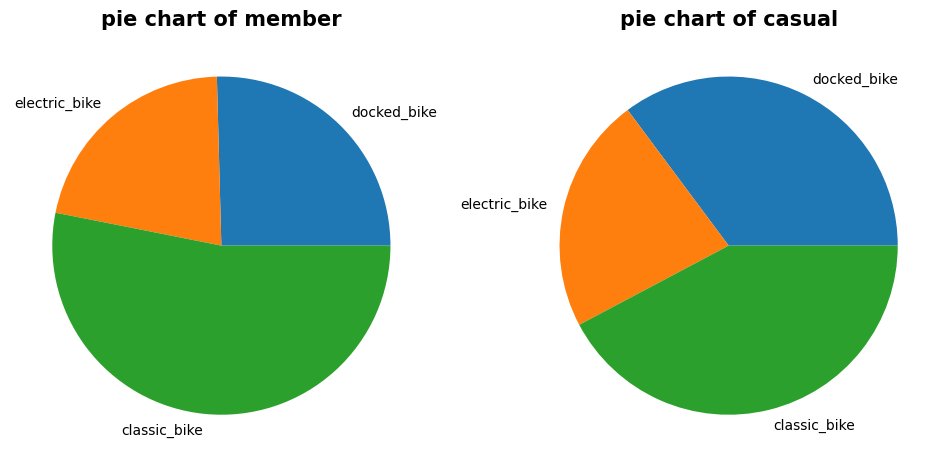

In [ ]:
#(iii) type of bike vs no.of rides
y=df.groupBy('rideable_type').agg(count("*"))
y=y.select("rideable_type")
a=np.array(y.collect())
m=[]
c=[]
li=[]
for i in a:
    li.append(i[0])
    
for i in li:
    u=member.filter(member.rideable_type == i)
    v=casual.filter(casual.rideable_type ==i)
    u=u.agg(count("*"))
    v=v.agg(count("*"))
    var=np.array(u.collect())
    m.append(var[0][0])
    var=np.array(v.collect())
    c.append(var[0][0])
barWidth=0.25
fig=plt.subplots(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("pie chart of member",fontweight='bold',fontsize=15)
plt.pie(m,labels=li)
plt.subplot(1,2,2)
plt.title("pie chart of casual",fontweight='bold',fontsize=15)
plt.pie(c,labels=li)
plt.show()

Highest starting location by casual:  Streeter Dr & Grand Ave  count:  121990
lowest starting location by casual:  351  count:  1
Plot for top 10 starting location by casual:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30028\359704608.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


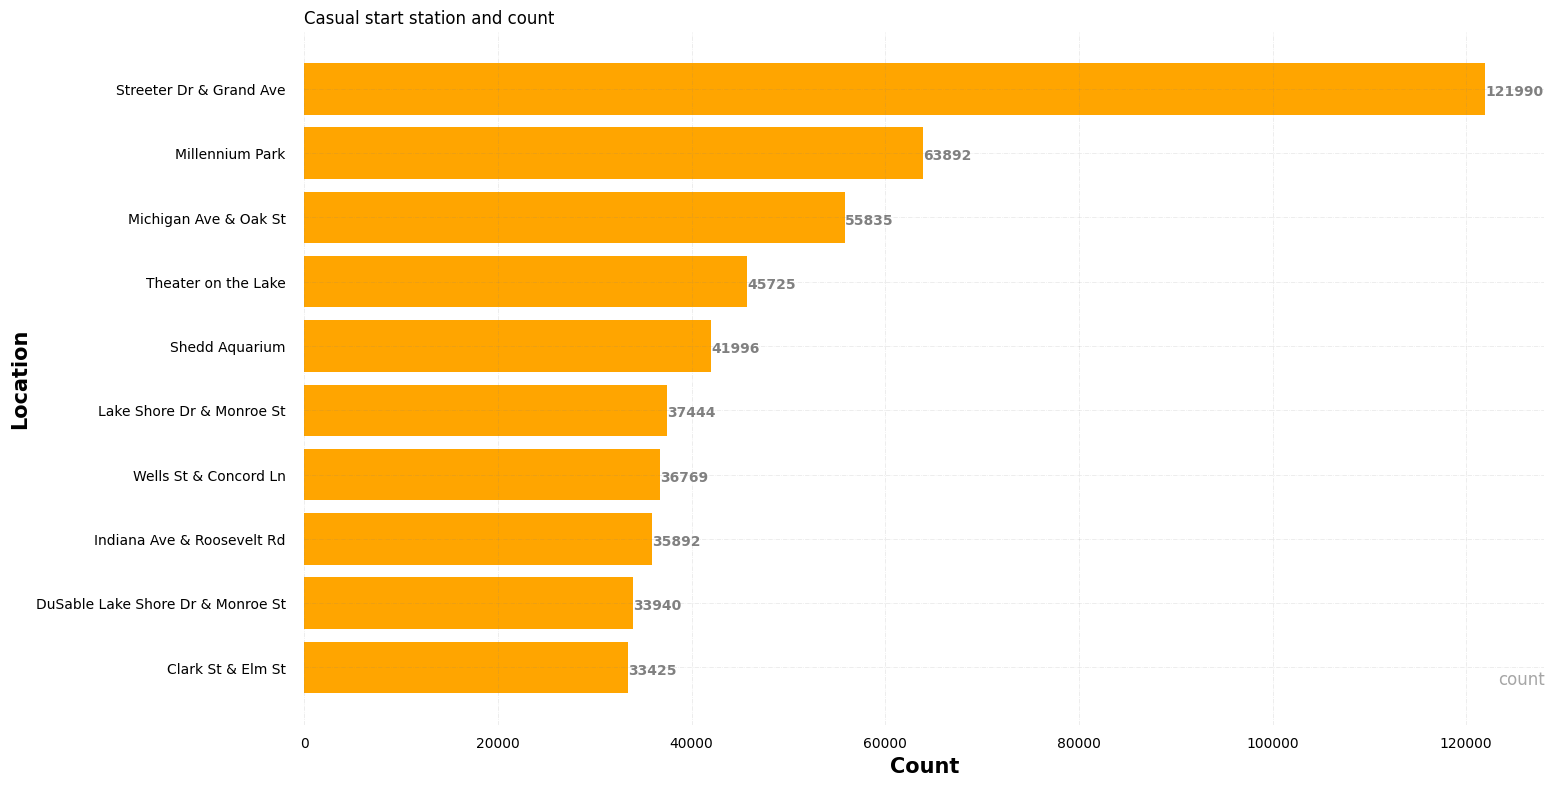

In [ ]:
#(iv) casual start_station
start_s_c=casual.groupBy('start_station_name').agg(count("*"))
s=np.array(start_s_c.select("start_station_name").collect())
cou=np.array(start_s_c.select("count(1)").collect())
ssn=[]
co_li=[]
for i in s:
    ssn.append(i[0])
for i in cou:
    co_li.append(i[0])
fig, ax = plt.subplots(figsize =(16, 9))
zipped_lists = zip(co_li, ssn)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
co_li, ssn = [ list(tuple) for tuple in tuples]

print("Highest starting location by casual: ",ssn[-1]," count: ", co_li[-1])
print("lowest starting location by casual: ",ssn[0]," count: ", co_li[0])
print("Plot for top 10 starting location by casual:")
ax.barh(ssn[-1:-11:-1], co_li[-1:-11:-1],color="orange")
 
# Remove axes splines

for s in ['top', 'bottom', 'left', 'right']:

    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks

ax.xaxis.set_ticks_position('none')

ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels

ax.xaxis.set_tick_params(pad = 5)

ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines

ax.grid(b = True, color ='grey',

        linestyle ='-.', linewidth = 0.5,

        alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars

for i in ax.patches:

    plt.text(i.get_width()+0.2, i.get_y()+0.5, 

             str(((i.get_width()))),

             fontsize = 10, fontweight ='bold',

             color ='grey')
 
# Add Plot Title

ax.set_title('Casual start station and count',

             loc ='left', )
 
# Add Text watermark

fig.text(0.9, 0.15, 'count', fontsize = 12,

         color ='grey', ha ='right', va ='bottom',

         alpha = 0.7)
 
# Show Plot
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Location',fontweight='bold',fontsize=15)
plt.show()

Highest starting location by member:  Clark St & Elm St  count:  52700
lowest starting location by member:  111th St - Morgan Park Metra  count:  1
Plot for top 10 starting location by member:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30028\937415981.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


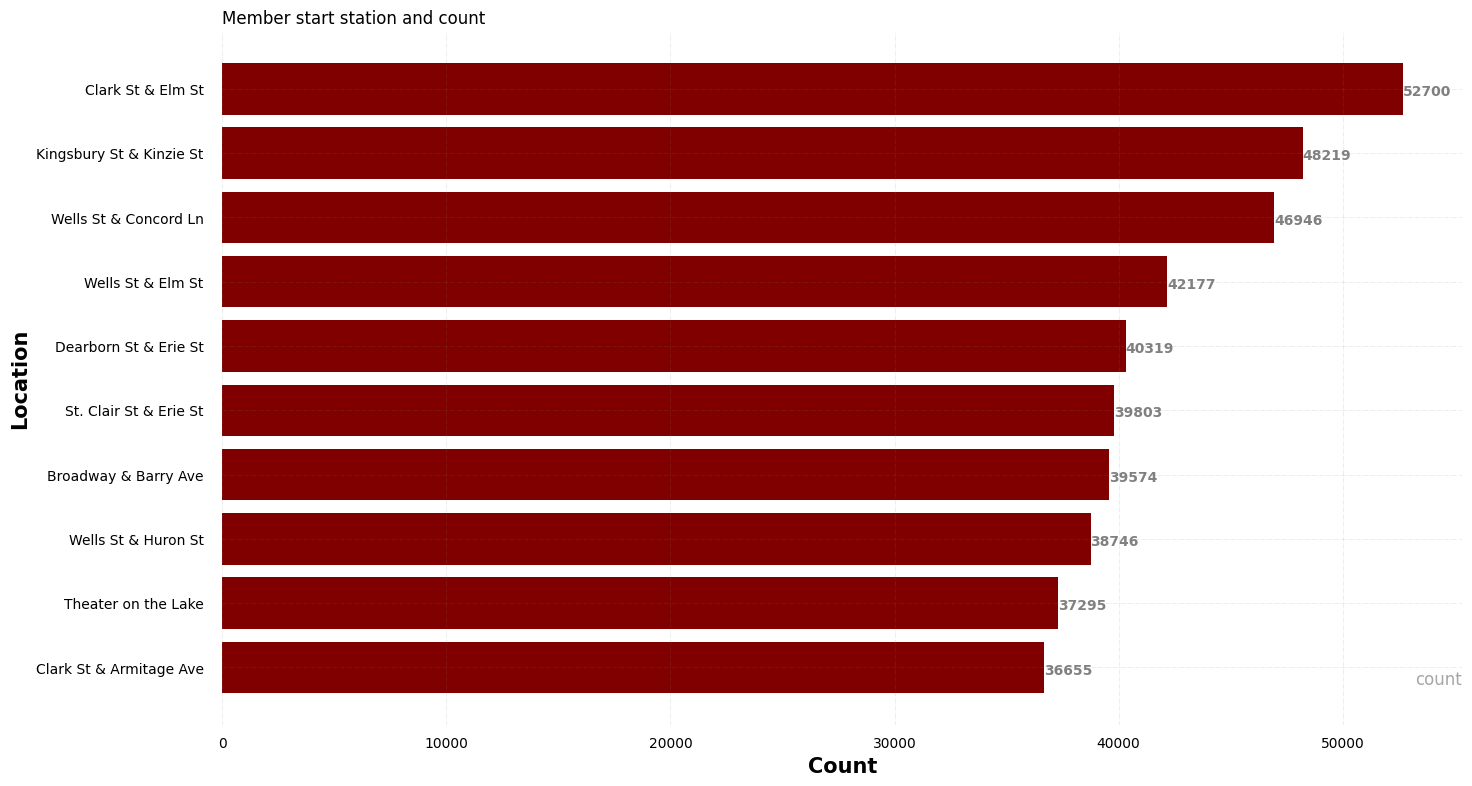

In [ ]:
#(v)member start_station
start_s_m=member.groupBy('start_station_name').agg(count("*"))
s=np.array(start_s_m.select("start_station_name").collect())
cou=np.array(start_s_m.select("count(1)").collect())
ssn=[]
co_li=[]
for i in s:
    ssn.append(i[0])
for i in cou:
    co_li.append(i[0])
fig, ax = plt.subplots(figsize =(16, 9))
zipped_lists = zip(co_li, ssn)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
co_li, ssn = [ list(tuple) for tuple in tuples]

print("Highest starting location by member: ",ssn[-1]," count: ", co_li[-1])
print("lowest starting location by member: ",ssn[0]," count: ", co_li[0])
print("Plot for top 10 starting location by member:")
ax.barh(ssn[-1:-11:-1], co_li[-1:-11:-1],color="maroon")
 
# Remove axes splines

for s in ['top', 'bottom', 'left', 'right']:

    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks

ax.xaxis.set_ticks_position('none')

ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels

ax.xaxis.set_tick_params(pad = 5)

ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines

ax.grid(b = True, color ='grey',

        linestyle ='-.', linewidth = 0.5,

        alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars

for i in ax.patches:

    plt.text(i.get_width()+0.2, i.get_y()+0.5, 

             str(((i.get_width()))),

             fontsize = 10, fontweight ='bold',

             color ='grey')
 
# Add Plot Title

ax.set_title('Member start station and count',

             loc ='left', )
 
# Add Text watermark

fig.text(0.9, 0.15, 'count', fontsize = 12,

         color ='grey', ha ='right', va ='bottom',

         alpha = 0.7)
 
# Show Plot
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Location',fontweight='bold',fontsize=15)
plt.show()

Highest ending location by casual:  Streeter Dr & Grand Ave  count:  128910
lowest ending location by casual:  111th St - Morgan Park Metra  count:  1
Plot for top 10 ending location by casual:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30028\889331021.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


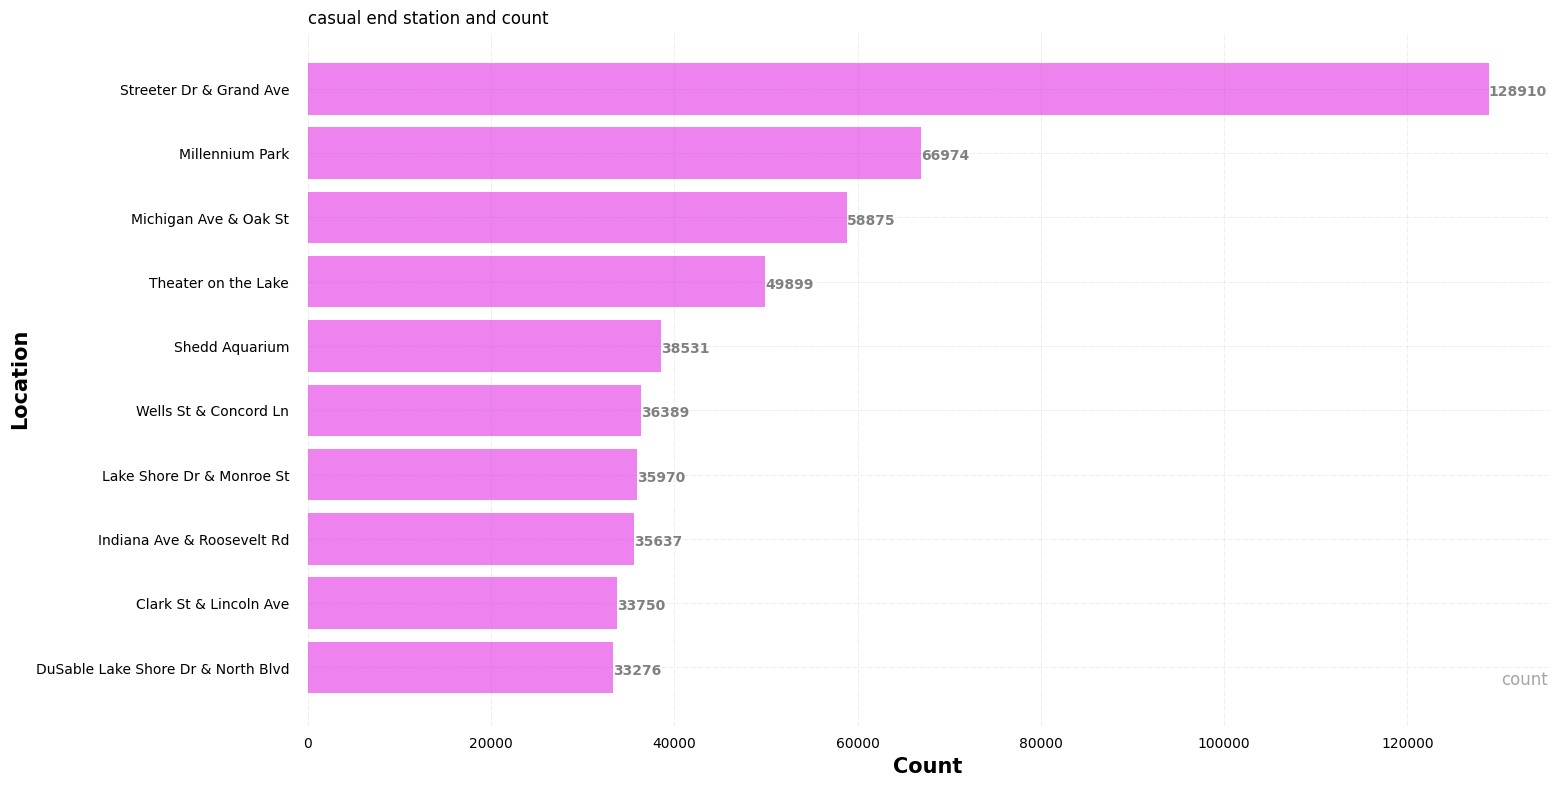

In [ ]:
# (vi)casual end_station
start_s_c=casual.groupBy('end_station_name').agg(count("*"))
s=np.array(start_s_c.select("end_station_name").collect())
cou=np.array(start_s_c.select("count(1)").collect())
ssn=[]
co_li=[]
for i in s:
    ssn.append(i[0])
for i in cou:
    co_li.append(i[0])
zipped_lists = zip(co_li, ssn)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
co_li, ssn = [ list(tuple) for tuple in tuples]
fig, ax = plt.subplots(figsize =(16, 9))
print("Highest ending location by casual: ",ssn[-1]," count: ", co_li[-1])
print("lowest ending location by casual: ",ssn[0]," count: ", co_li[0])
print("Plot for top 10 ending location by casual:")
ax.barh(ssn[-1:-11:-1], co_li[-1:-11:-1],color="violet")

 
# Remove axes splines

for s in ['top', 'bottom', 'left', 'right']:

    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks

ax.xaxis.set_ticks_position('none')

ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels

ax.xaxis.set_tick_params(pad = 5)

ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines

ax.grid(b = True, color ='grey',

        linestyle ='-.', linewidth = 0.5,

        alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars

for i in ax.patches:

    plt.text(i.get_width()+0.2, i.get_y()+0.5, 

             str(((i.get_width()))),

             fontsize = 10, fontweight ='bold',

             color ='grey')
 
# Add Plot Title

ax.set_title('casual end station and count',

             loc ='left', )
 
# Add Text watermark

fig.text(0.9, 0.15, 'count', fontsize = 12,

         color ='grey', ha ='right', va ='bottom',

         alpha = 0.7)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Location',fontweight='bold',fontsize=15)
# Show Plot
plt.show()

Highest ending location by member:  Clark St & Elm St  count:  53407
lowest ending location by member:  83rd St (Avalon Park) Metra  count:  1
Plot for top 10 ending location by member:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30028\2230693589.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


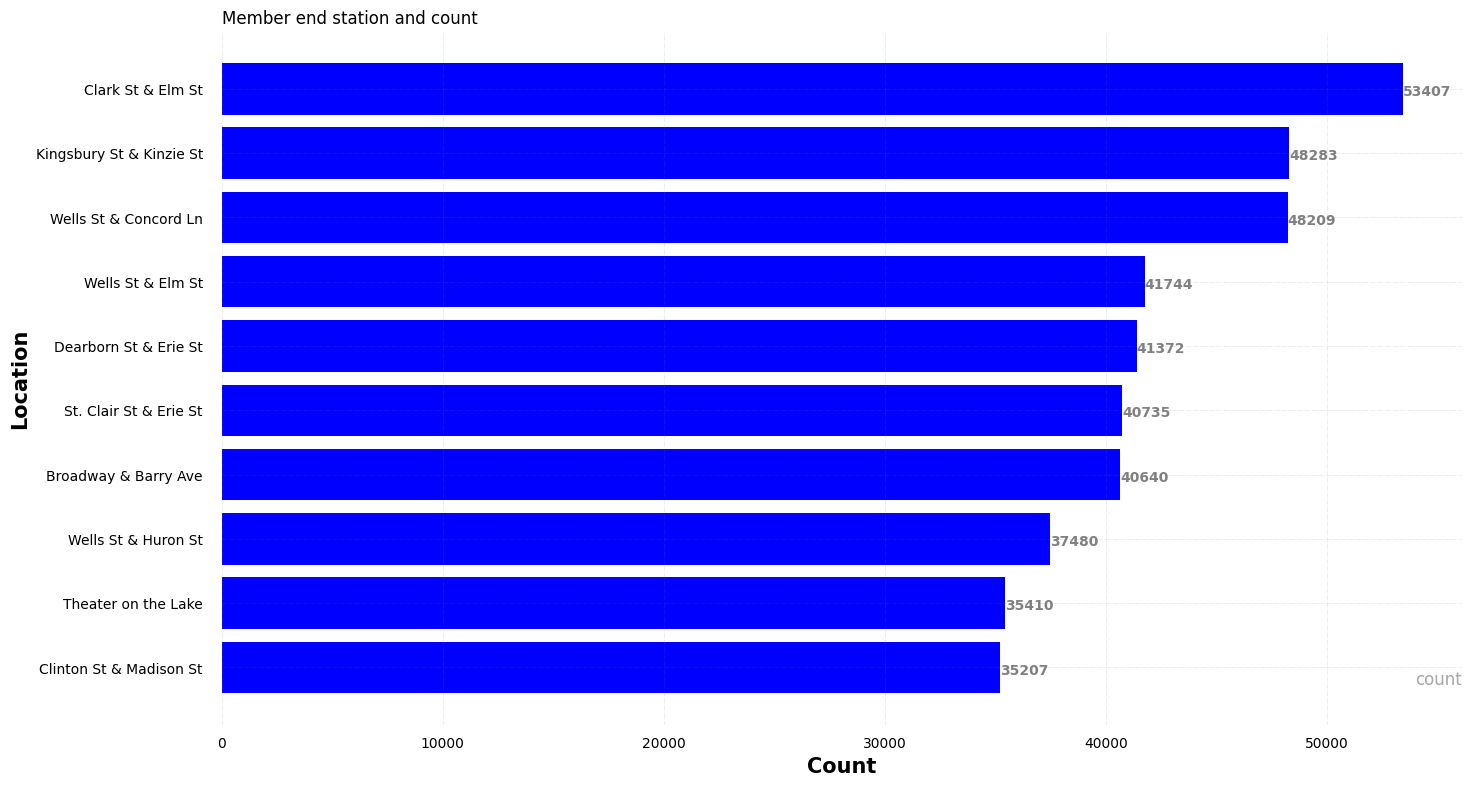

In [ ]:
#(vii)member end_station
start_s_m=member.groupBy('end_station_name').agg(count("*"))
s=np.array(start_s_m.select("end_station_name").collect())
cou=np.array(start_s_m.select("count(1)").collect())
ssn=[]
co_li=[]
for i in s:
    ssn.append(i[0])
for i in cou:
    co_li.append(i[0])
zipped_lists = zip(co_li, ssn)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
co_li, ssn = [ list(tuple) for tuple in tuples]
fig, ax = plt.subplots(figsize =(16, 9))
print("Highest ending location by member: ",ssn[-1]," count: ", co_li[-1])
print("lowest ending location by member: ",ssn[0]," count: ", co_li[0])
print("Plot for top 10 ending location by member:")
ax.barh(ssn[-1:-11:-1], co_li[-1:-11:-1],color="blue")

 
# Remove axes splines

for s in ['top', 'bottom', 'left', 'right']:

    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks

ax.xaxis.set_ticks_position('none')

ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels

ax.xaxis.set_tick_params(pad = 5)

ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines

ax.grid(b = True, color ='grey',

        linestyle ='-.', linewidth = 0.5,

        alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars

for i in ax.patches:

    plt.text(i.get_width()+0.2, i.get_y()+0.5, 

             str(((i.get_width()))),

             fontsize = 10, fontweight ='bold',

             color ='grey')
 
# Add Plot Title

ax.set_title('Member end station and count',

             loc ='left', )
 
# Add Text watermark

fig.text(0.9, 0.15, 'count', fontsize = 12,

         color ='grey', ha ='right', va ='bottom',

         alpha = 0.7)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Location',fontweight='bold',fontsize=15)
# Show Plot
plt.show()

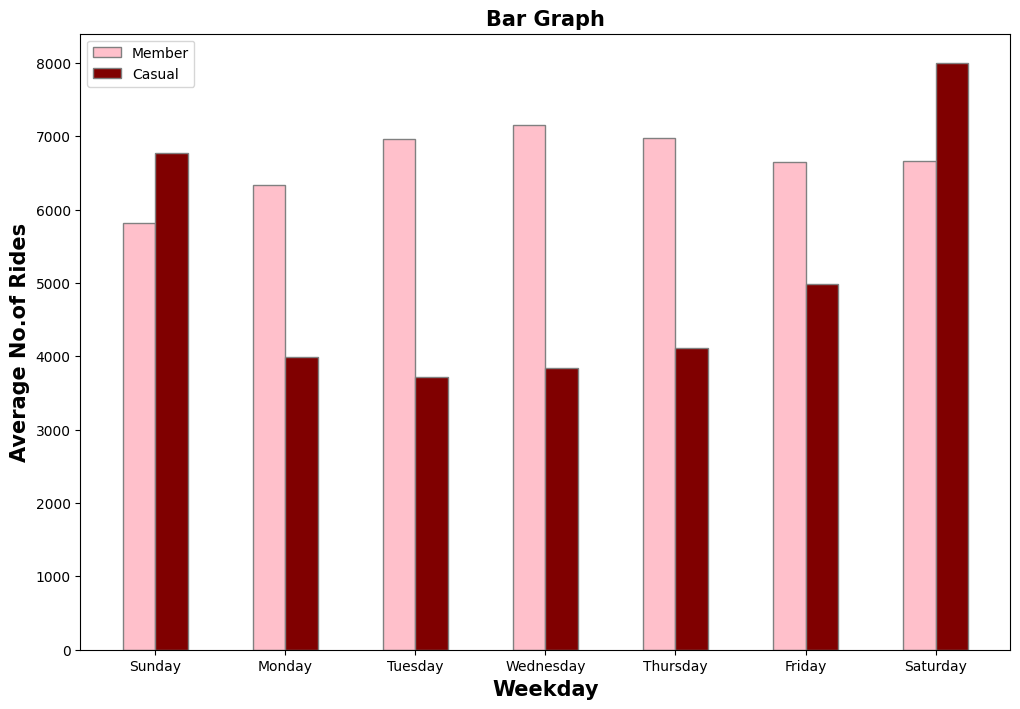

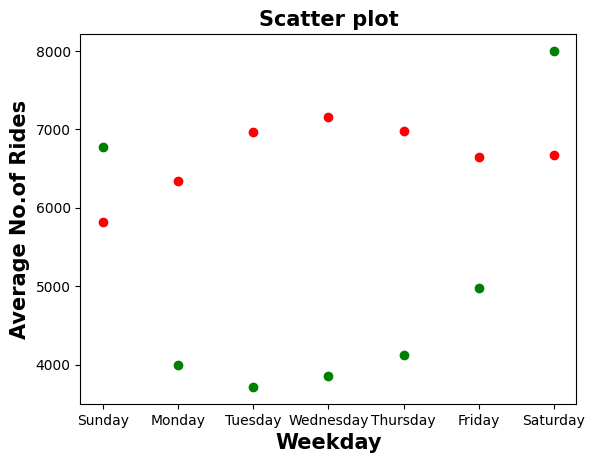

In [ ]:
#(viii) average rides per day
import calendar
import datetime
lis1=df.withColumn("started_at",to_timestamp(col("started_at")))
k=np.array(lis1.select(min("started_at")).collect())
l=np.array(lis1.select(max("started_at")).collect())
week={}
def weekday_count(start, end):
    for i in range((end - start).days):
        day = calendar.day_name[(start + datetime.timedelta(days=i + 1)).weekday()]
        week[day] = week[day] + 1 if day in week else 1
    return "success"
weekday_count(k[0][0],l[0][0])
lis=df.withColumn("started_at",to_timestamp(col("started_at"))).withColumn("D_O_M",dayofweek(col("started_at")))
# lis.select("D_O_M").show()
member=lis.filter("member_casual=='member'")
casual=lis.filter("member_casual=='casual'")
lis=lis.groupBy('D_O_M').agg(count("*"))
lis=lis.orderBy(lis.D_O_M.asc())
a=np.array(lis.select("D_O_M").collect())
m=[0]*7
c=[0]*7
li=[]
for i in a:
    li.append(i[0])
for i in li:
    u=member.filter(member.D_O_M == str(i))
    v=casual.filter(casual.D_O_M ==str(i))
    u=u.agg(count("*"))
    v=v.agg(count("*"))
    var=np.array(u.collect())
    m[i-1]=(var[0][0])
    var=np.array(v.collect())
    c[i-1]=(var[0][0])
days=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
va=[]
ma=[]
for i in range(len(c)):
    va.append(c[i]//week[days[i]])
    ma.append(m[i]//week[days[i]])
c=va
m=ma
barWidth=0.25
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(m))
br2=[x+barWidth for x in br1]
plt.title("Bar Graph",fontweight='bold',fontsize=15)
plt.bar(br1,m,color='pink',width=barWidth,edgecolor='grey',label='Member')
plt.bar(br2,c,color='maroon',width=barWidth,edgecolor='grey',label='Casual')
plt.ylabel('Average No.of Rides',fontweight='bold',fontsize=15)
plt.xlabel('Weekday',fontweight='bold',fontsize=15)
plt.xticks([0.125+r for r in range(len(m))],days)
plt.legend()
plt.show()
plt.title("Scatter plot",fontweight='bold',fontsize=15)
plt.ylabel('Average No.of Rides',fontweight='bold',fontsize=15)
plt.xlabel('Weekday',fontweight='bold',fontsize=15)
plt.scatter(days,m,color='red',label='member')
plt.scatter(days,c,color='green',label='casual')
plt.show()

distance of rides by given latitude and longitude data:
+-----+
|Miles|
+-----+
|  0.0|
|  0.0|
| 0.13|
|  0.0|
|22.35|
|62.66|
| 0.36|
|  0.0|
|21.61|
| 8.89|
|19.38|
|19.38|
| 4.97|
|  0.0|
|25.21|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
|  0.0|
+-----+
only showing top 20 rows



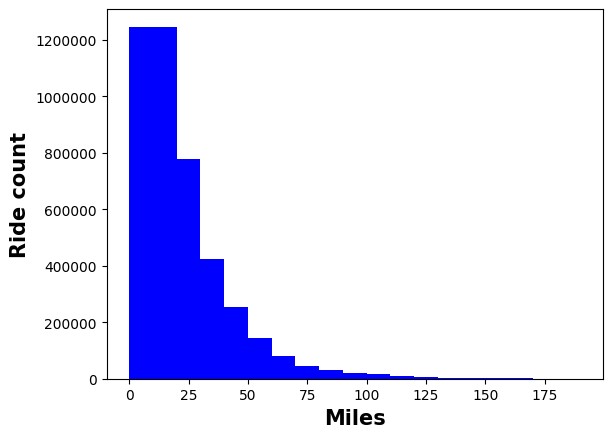

In [ ]:
#(ix)distance by casual
import pyspark.sql.functions as F
casual=df.filter("member_casual=='casual'")
h = casual.withColumn("a", (
        F.pow(F.sin(F.radians(F.col("end_lat") - F.col("start_lat")) / 2), 2) +
        F.cos(F.radians(F.col("start_lat"))) * F.cos(F.radians(F.col("end_lat"))) *
        F.pow(F.sin(F.radians(F.col("end_lng") - F.col("start_lng")) / 2), 2)
    )).withColumn("distance", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)
print("distance of rides by given latitude and longitude data:")
h=h.withColumn("Miles",F.round((F.col("distance")/100),2))
h.select("Miles").show()
res=np.array(h.select("Miles").collect())
li1=[]
for i in res:
    try:
        li1.append(float(i[0]))
    except:
        pass
plt.ticklabel_format(style='plain')
plt.hist(li1,bins=range(0,200,10),color="blue")
plt.ylabel('Ride count',fontweight='bold',fontsize=15)
plt.xlabel('Miles',fontweight='bold',fontsize=15)
plt.show()

distance of rides by given latitude and longitude data:
+-----+
|Miles|
+-----+
|  0.0|
| 4.95|
|19.38|
| 4.95|
| 4.95|
| 4.95|
|  0.0|
|  0.0|
| 4.95|
|  0.0|
|  0.0|
|  0.0|
|32.66|
|  0.0|
|  0.0|
|14.97|
| 4.95|
| 4.95|
|14.84|
| 4.95|
+-----+
only showing top 20 rows



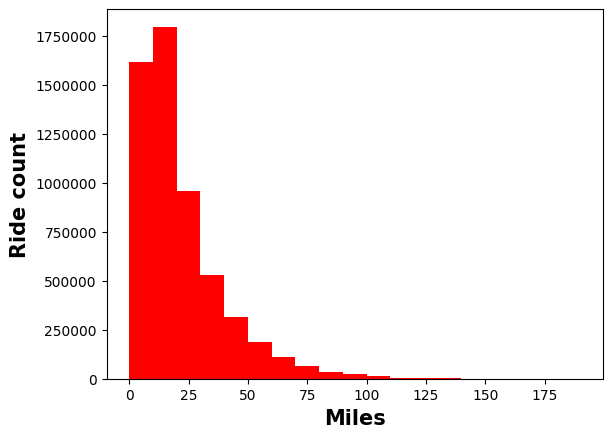

In [ ]:
#(x)distance by member
import pyspark.sql.functions as F
member=df.filter("member_casual=='member'")
h = member.withColumn("a", (
        F.pow(F.sin(F.radians(F.col("end_lat") - F.col("start_lat")) / 2), 2) +
        F.cos(F.radians(F.col("start_lat"))) * F.cos(F.radians(F.col("end_lat"))) *
        F.pow(F.sin(F.radians(F.col("end_lng") - F.col("start_lng")) / 2), 2)
    )).withColumn("distance", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)

print("distance of rides by given latitude and longitude data:")
h=h.withColumn("Miles",F.round((F.col("distance")/100),2))
h.select("Miles").show()
res=np.array(h.select("Miles").collect())
li2=[]
for i in res:
    try:
        li2.append(float(i[0]))
    except:
        li2.append(float(0))
plt.hist(li2,bins=range(0,200,10),color="red")
plt.ylabel('Ride count',fontweight='bold',fontsize=15)
plt.ticklabel_format(style='plain')
plt.xlabel('Miles',fontweight='bold',fontsize=15)
plt.show()


duration of rides :
+-------+
|Minutes|
+-------+
|  230.5|
|  19.67|
|   1.03|
|   0.48|
|  28.83|
|  38.22|
|  99.08|
|  49.65|
|  11.32|
|  22.17|
|  17.05|
|   6.97|
|   2.42|
|  68.52|
|  18.28|
|  21.57|
|   0.37|
|   1.23|
|   0.28|
|   3.62|
+-------+
only showing top 20 rows



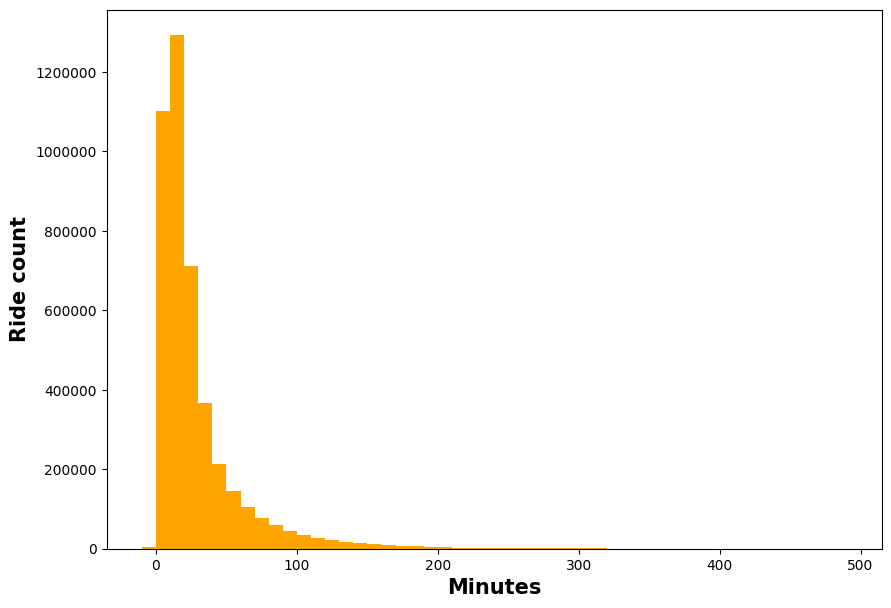

In [ ]:
#(xi)duration by casual
df2=df.filter("member_casual=='casual'")
df2=df2.withColumn('started_at',to_timestamp(col('started_at')))\
  .withColumn('ended_at', to_timestamp(col('ended_at')))\
  .withColumn('DiffInSeconds', col('ended_at').cast("long")-col("started_at").cast("long"))
df2=df2.withColumn("Minutes",F.round((F.col("DiffInSeconds")/60),2))
print("duration of rides :")
df2.select("Minutes").show()
arr1=np.array(df2.select("Minutes").collect())
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(arr1,bins=range(-10,500,10),color="orange")
plt.ticklabel_format(style='plain')
plt.ylabel('Ride count',fontweight='bold',fontsize=15)
plt.xlabel('Minutes',fontweight='bold',fontsize=15)
plt.show()

duration of rides :
+-------+
|Minutes|
+-------+
|  16.27|
|   2.02|
|   7.78|
|   2.63|
|   2.43|
|   3.63|
|  32.57|
|  18.53|
|   2.77|
|  26.97|
|  42.15|
|  41.98|
|  18.02|
|  11.73|
|  43.97|
|    9.7|
|   2.87|
|   2.42|
|   9.08|
|   3.38|
+-------+
only showing top 20 rows



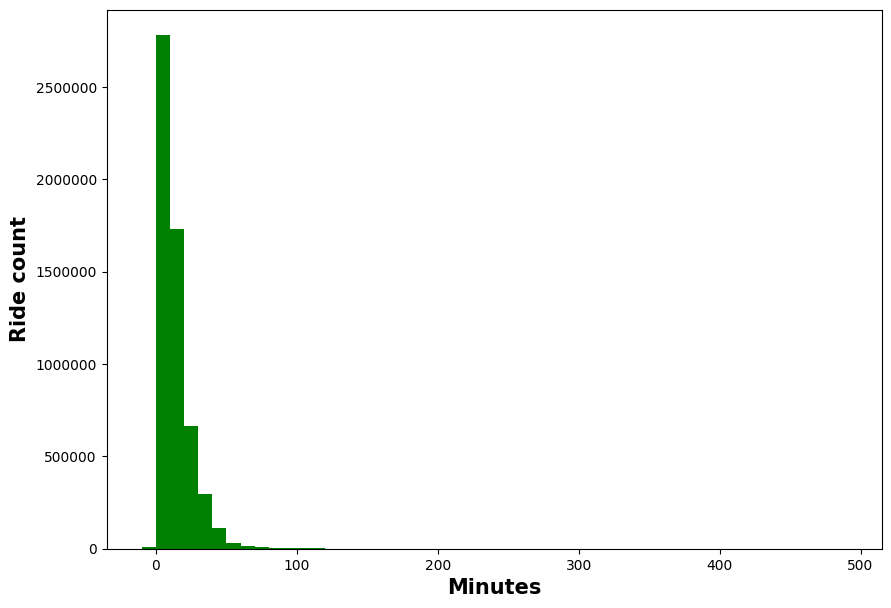

In [ ]:
#(xii)duration by member
df2=df.filter("member_casual=='member'")
df2=df2.withColumn('started_at',to_timestamp(col('started_at')))\
  .withColumn('ended_at', to_timestamp(col('ended_at')))\
  .withColumn('DiffInSeconds', col('ended_at').cast("long")-col("started_at").cast("long"))
df2=df2.withColumn("Minutes",F.round((F.col("DiffInSeconds")/60),2))
print("duration of rides :")
df2.select("Minutes").show()
arr2=np.array(df2.select("Minutes").collect())
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(arr2,bins=range(-10,500,10),color="green")
plt.ticklabel_format(style='plain')
plt.ylabel('Ride count',fontweight='bold',fontsize=15)
plt.xlabel('Minutes',fontweight='bold',fontsize=15)
plt.show()

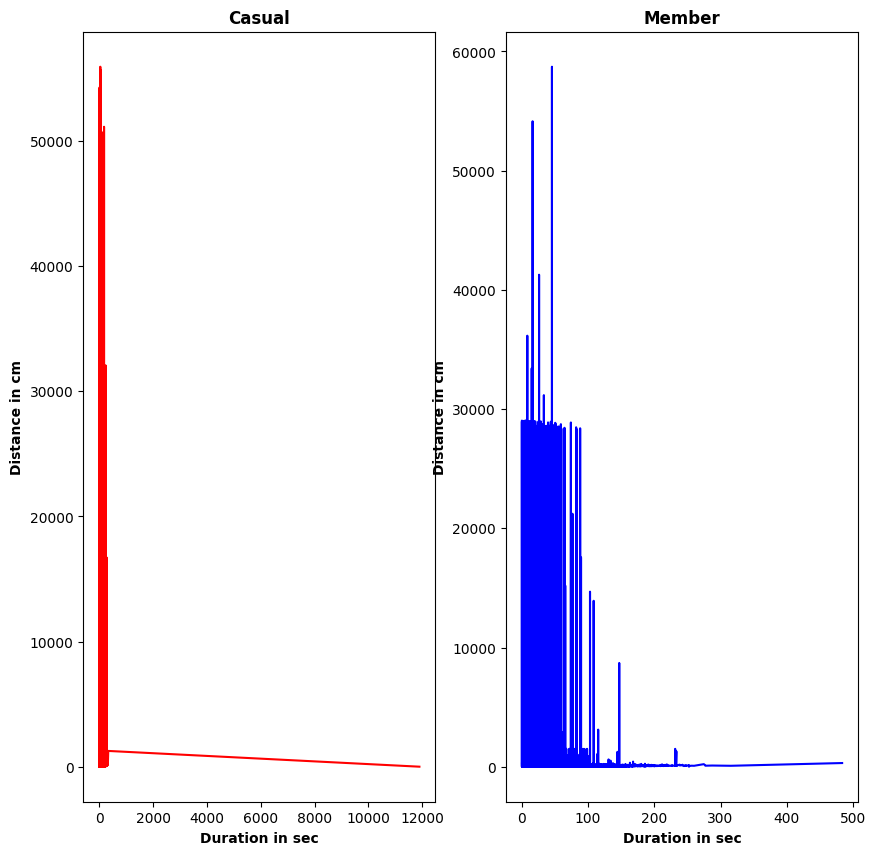

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,10))
zipped_lists = zip(li1, arr1)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
li1, arr1 = [ list(tuple) for tuple in tuples]
li1=np.abs(li1)
arr1=np.abs(arr1)
ax[0].plot(li1,arr1,color='red')
ax[0].set_title("Casual",fontweight='bold')
ax[1].set_title("Member",fontweight='bold')
zipped_lists = zip(li2, arr2)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
li2, arr2 = [ list(tuple) for tuple in tuples]
li2=np.abs(li2)
arr2=np.abs(arr2)
ax[1].plot(li2,arr2,color='blue')
ax[0].set_ylabel('Distance in cm',fontweight='bold')
ax[0].set_xlabel('Duration in sec',fontweight='bold')
ax[1].set_ylabel('Distance in cm',fontweight='bold')
ax[1].set_xlabel('Duration in sec',fontweight='bold')
plt.show()

+-------------+---------------------+
|rideable_type|(sum(distance) / 100)|
+-------------+---------------------+
|  docked_bike|  6.463212714712515E7|
|electric_bike| 5.2218113890755005E7|
| classic_bike|  9.852766831085561E7|
+-------------+---------------------+



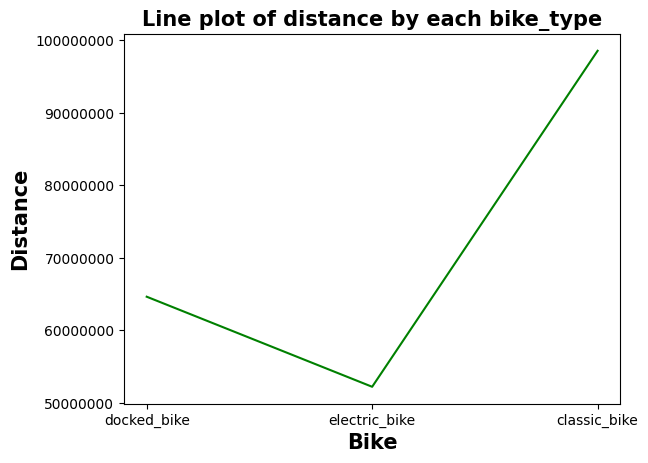

In [ ]:

h = df.withColumn("a", (
        F.pow(F.sin(F.radians(F.col("end_lat") - F.col("start_lat")) / 2), 2) +
        F.cos(F.radians(F.col("start_lat"))) * F.cos(F.radians(F.col("end_lat"))) *
        F.pow(F.sin(F.radians(F.col("end_lng") - F.col("start_lng")) / 2), 2)
    )).withColumn("distance", F.atan2(F.sqrt(F.col("a")), F.sqrt(-F.col("a") + 1)) * 12742000)
a=h.groupBy('rideable_type').agg(sum('distance')/100)
a.show()
res=np.array(a.select("(sum(distance) / 100)").collect())
li1=[]
for i in res:
    try:
        li1.append(float(i[0]))
    except:
        pass
res=np.array(a.select("rideable_type").collect())
li2=[]
for i in res:
    try:
        li2.append(i[0])
    except:
        pass
plt.ticklabel_format(style='plain')
plt.title("Line plot of distance by each bike_type",fontweight='bold',fontsize=15)
plt.xlabel('Bike',fontweight='bold',fontsize=15)
plt.ylabel('Distance',fontweight='bold',fontsize=15)
plt.plot(li2,li1,color="green")
plt.show()